In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
)

In [3]:
# Machine Learning Classifier Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier , VotingClassifier
from xgboost import XGBClassifier

In [4]:
# Handling Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [5]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Load Dataset

In [7]:
data = pd.read_csv("medicine_recommendation.csv")
data.head(3)

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen


In [8]:
data.shape

(1000, 20)

# 2. Exploratory Data Analysis (EDA)
## EDA is a crucial step to understand the dataset and identify potential issues. Here, we:

1. Check for missing values in each column.
2. Summarize numerical features using descriptive statistics.
3. Visualize the distribution of the target variable (Recommended_Medication).
4. Analyze correlations between numerical features using a heatmap.

In [10]:
# 1. Check for missing values in each column.
data.isnull().sum()

Temperature                 0
Fever_Severity              0
Age                         0
Gender                      0
BMI                         0
Headache                    0
Body_Ache                   0
Fatigue                     0
Chronic_Conditions          0
Allergies                   0
Smoking_History             0
Alcohol_Consumption         0
Humidity                    0
AQI                         0
Physical_Activity           0
Diet_Type                   0
Heart_Rate                  0
Blood_Pressure              0
Previous_Medication       237
Recommended_Medication      0
dtype: int64

In [11]:
data = data.dropna()
data.isnull().sum()

Temperature               0
Fever_Severity            0
Age                       0
Gender                    0
BMI                       0
Headache                  0
Body_Ache                 0
Fatigue                   0
Chronic_Conditions        0
Allergies                 0
Smoking_History           0
Alcohol_Consumption       0
Humidity                  0
AQI                       0
Physical_Activity         0
Diet_Type                 0
Heart_Rate                0
Blood_Pressure            0
Previous_Medication       0
Recommended_Medication    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 1 to 995
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             763 non-null    float64
 1   Fever_Severity          763 non-null    object 
 2   Age                     763 non-null    int64  
 3   Gender                  763 non-null    object 
 4   BMI                     763 non-null    float64
 5   Headache                763 non-null    object 
 6   Body_Ache               763 non-null    object 
 7   Fatigue                 763 non-null    object 
 8   Chronic_Conditions      763 non-null    object 
 9   Allergies               763 non-null    object 
 10  Smoking_History         763 non-null    object 
 11  Alcohol_Consumption     763 non-null    object 
 12  Humidity                763 non-null    float64
 13  AQI                     763 non-null    int64  
 14  Physical_Activity       763 non-null    object 

In [13]:
data.duplicated().unique()

array([False])

In [14]:
# 2. Summarize numerical features using descriptive statistics.
data.describe()

,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,38.124640,51.061599,26.489384,60.092792,249.403670,79.836173
std,1.136877,28.441036,4.886097,16.941745,143.155825,11.807763
min,36.000000,1.000000,18.000000,30.000000,1.000000,60.000000
25%,37.200000,27.000000,22.500000,46.300000,132.500000,70.000000
50%,38.200000,51.000000,26.500000,60.500000,250.000000,79.000000
75%,39.100000,75.000000,30.600000,74.400000,372.000000,90.000000
max,40.000000,100.000000,35.000000,90.000000,499.000000,100.000000


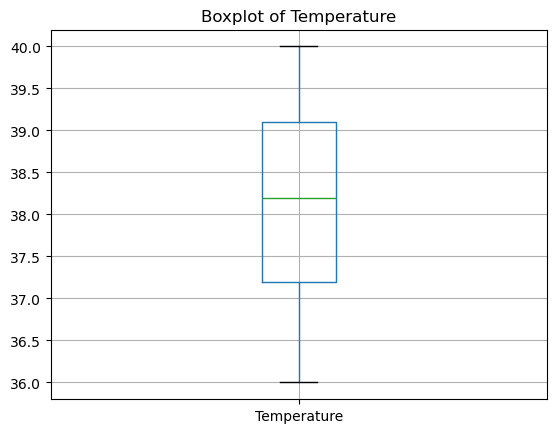

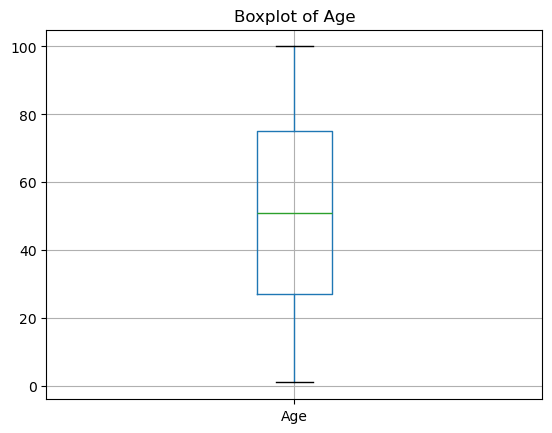

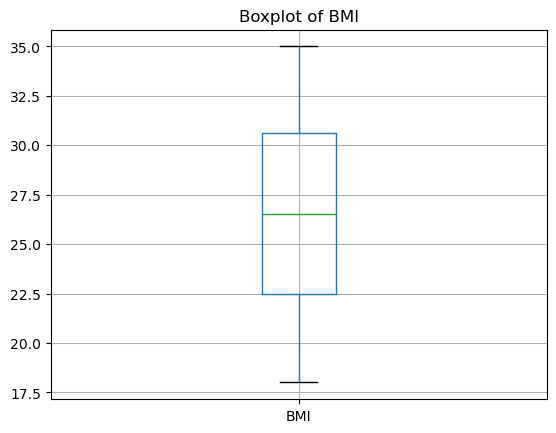

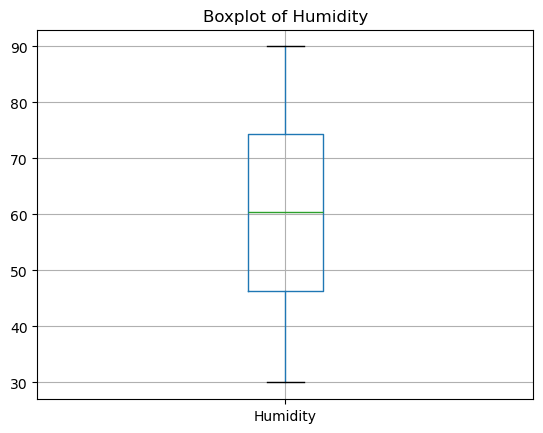

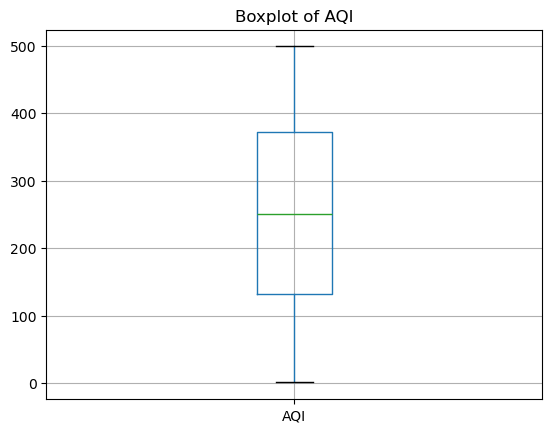

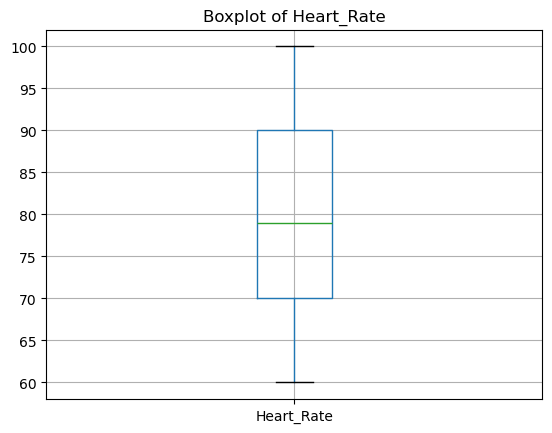

In [15]:
# Check Outliers
# Boxplot for all Numeric columns.
num_col = data.select_dtypes(include=["int64","float64"]).columns
for col in num_col:
    data.boxplot(col)
    plt.title(f"Boxplot of {col}")
    plt.show()

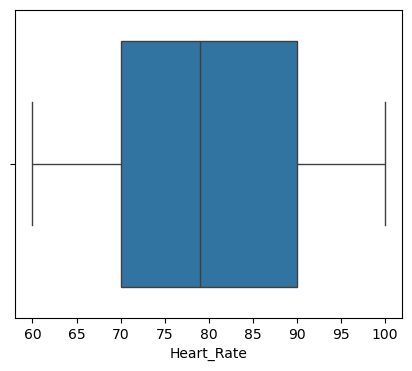

In [16]:
# Boxplot for spacific columns...
plt.figure(figsize=(5,4))
sns.boxplot(x="Heart_Rate", data=data)
plt.show()

In [17]:
# Unique Values of categorical Columns..
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}:\n{data[col].value_counts()}\n")

Fever_Severity:
Fever_Severity
High Fever    411
Normal        202
Mild Fever    150
Name: count, dtype: int64

Gender:
Gender
Male      385
Female    378
Name: count, dtype: int64

Headache:
Headache
Yes    392
No     371
Name: count, dtype: int64

Body_Ache:
Body_Ache
Yes    399
No     364
Name: count, dtype: int64

Fatigue:
Fatigue
No     382
Yes    381
Name: count, dtype: int64

Chronic_Conditions:
Chronic_Conditions
Yes    409
No     354
Name: count, dtype: int64

Allergies:
Allergies
No     398
Yes    365
Name: count, dtype: int64

Smoking_History:
Smoking_History
Yes    382
No     381
Name: count, dtype: int64

Alcohol_Consumption:
Alcohol_Consumption
Yes    400
No     363
Name: count, dtype: int64

Physical_Activity:
Physical_Activity
Active       276
Sedentary    247
Moderate     240
Name: count, dtype: int64

Diet_Type:
Diet_Type
Non-Vegetarian    265
Vegan             250
Vegetarian        248
Name: count, dtype: int64

Blood_Pressure:
Blood_Pressure
High      264
Normal    

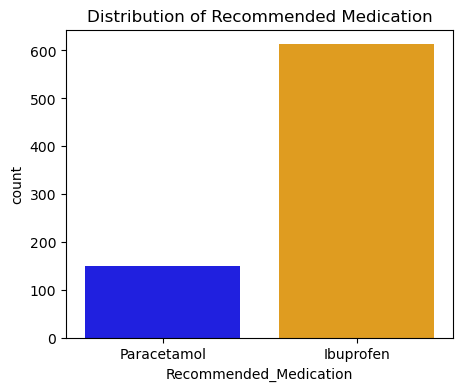

In [18]:
# Visualize the distribution of the target variable (Recommended_Medication).
plt.figure(figsize=(5,4))
sns.countplot(x="Recommended_Medication", palette=['blue', 'orange'], data=data)
plt.title('Distribution of Recommended Medication')
plt.show()

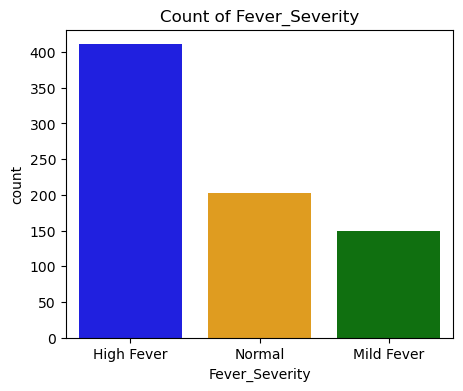

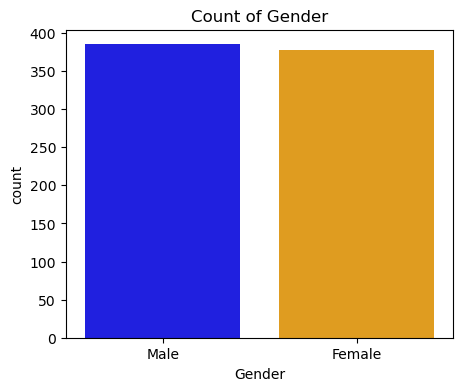

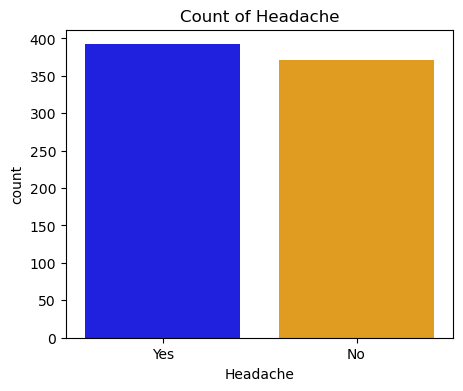

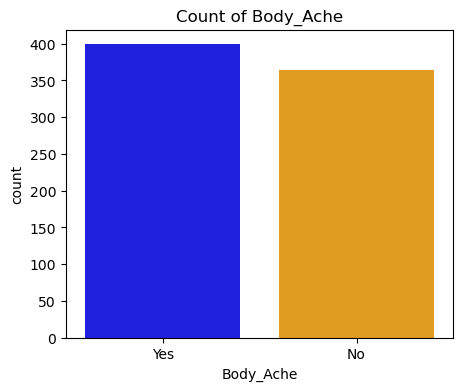

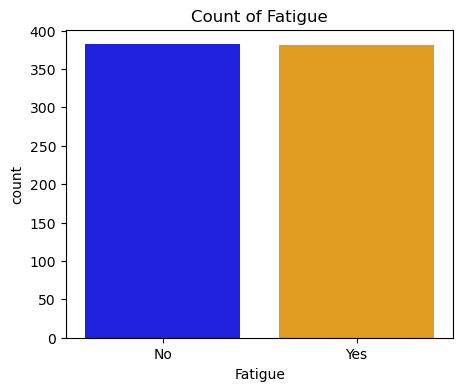

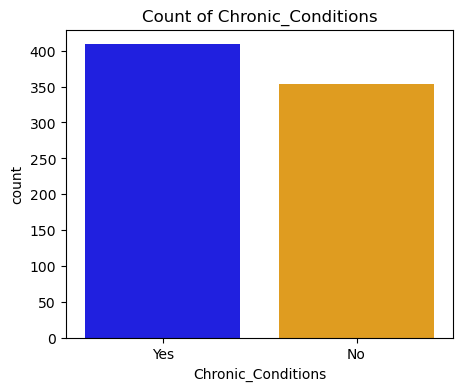

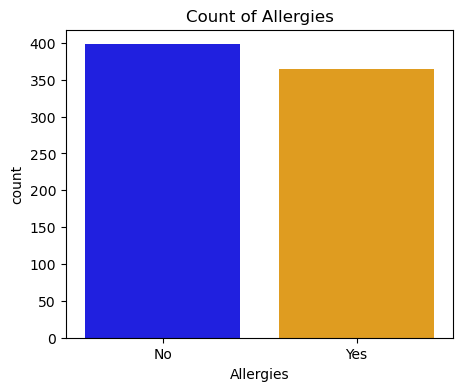

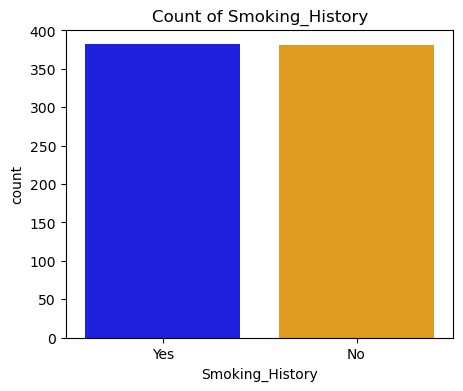

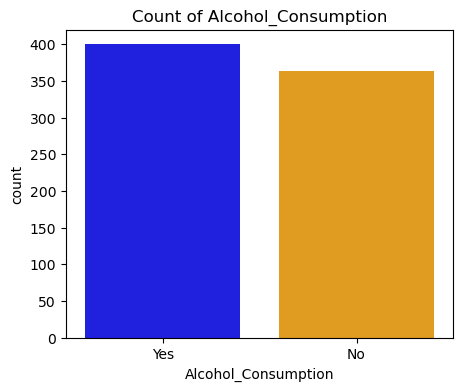

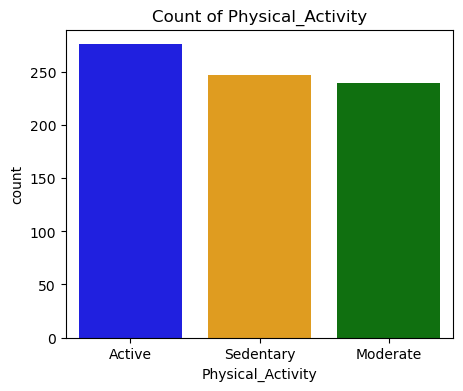

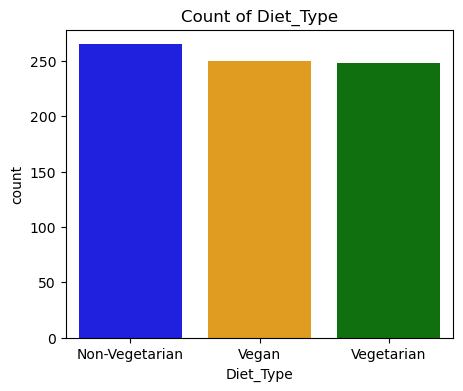

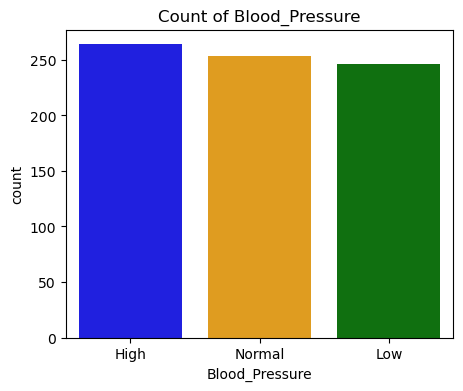

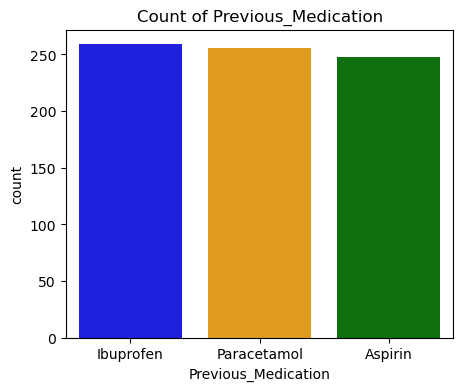

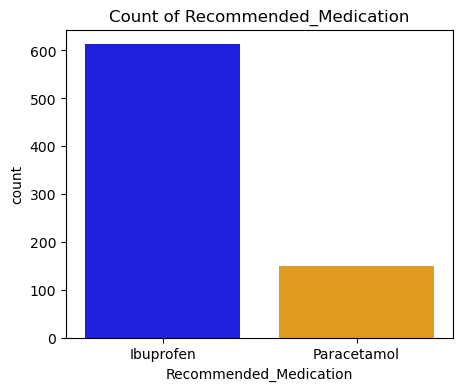

In [19]:
# Visualize the distribution of all the categorical columns..
obj_col = data.select_dtypes(include="object").columns
for col in obj_col:
    plt.figure(figsize=(5,4))
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette=['blue', 'orange', 'green'])
    plt.title(f"Count of {col}")
    plt.show()

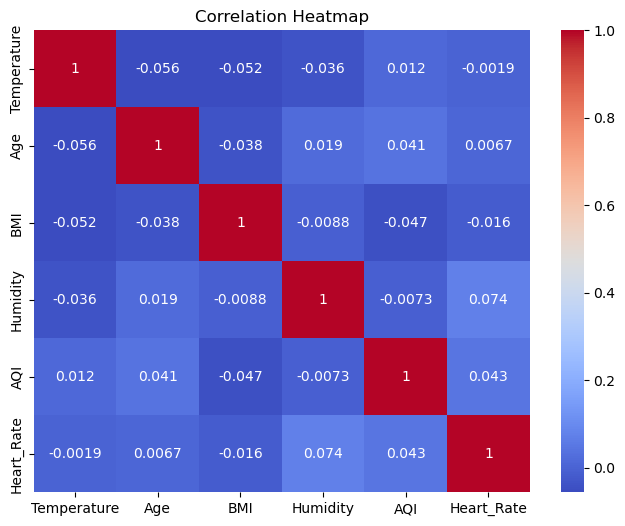

In [20]:
# Correlation heatmap for numerical features
numerical_features = ['Temperature', 'Age', 'BMI', 'Humidity', 'AQI', 'Heart_Rate']
plt.figure(figsize=(8,6))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Pairplot of numerical featur
sns.pairplot(data, hue = 'Recommended_Medication',
             vars = ['Temperature', 'Age', 'BMI', 'Humidity', 'AQI', 'Heart_Rate'])

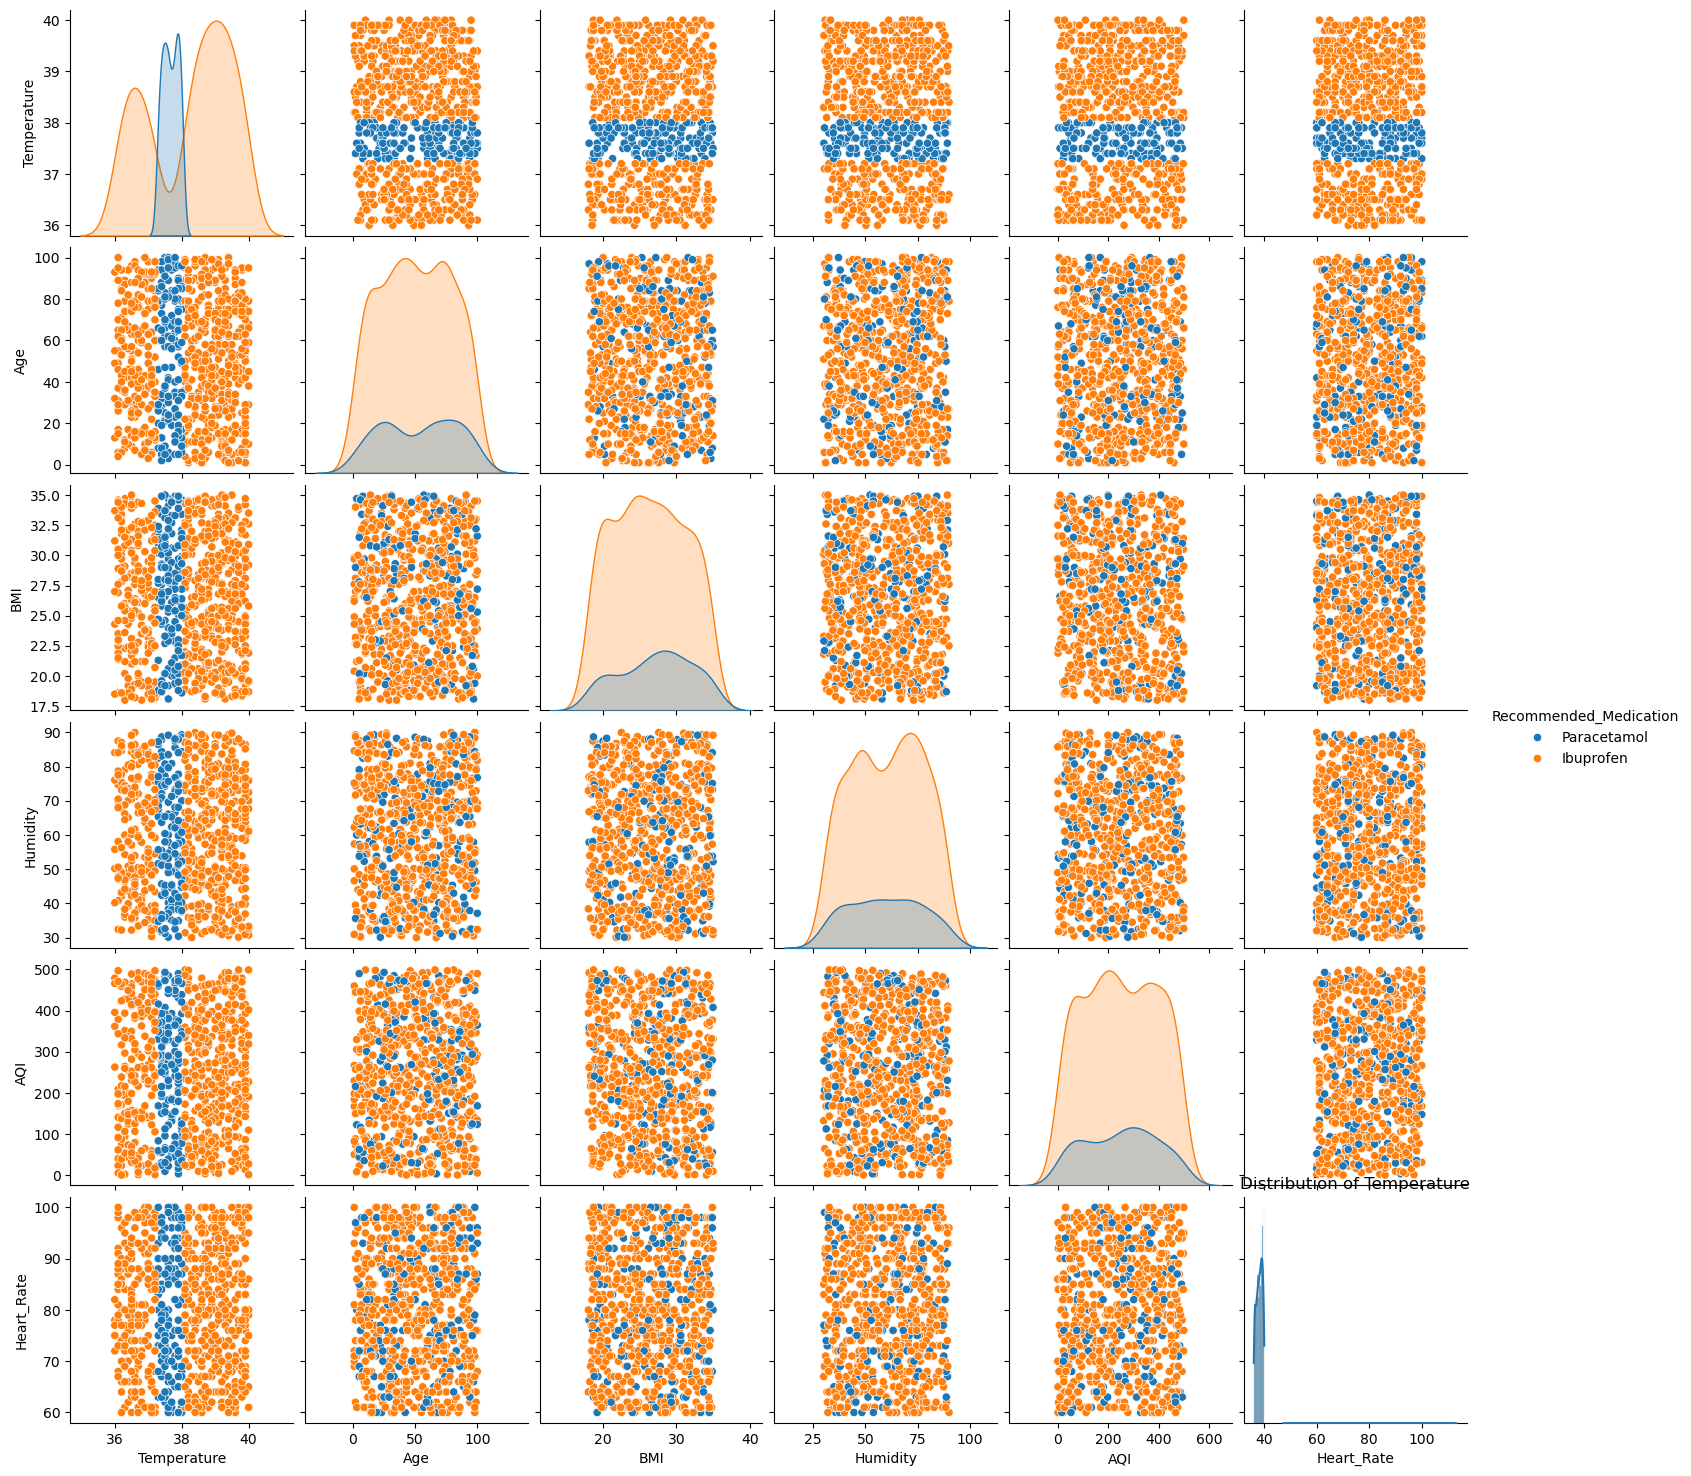

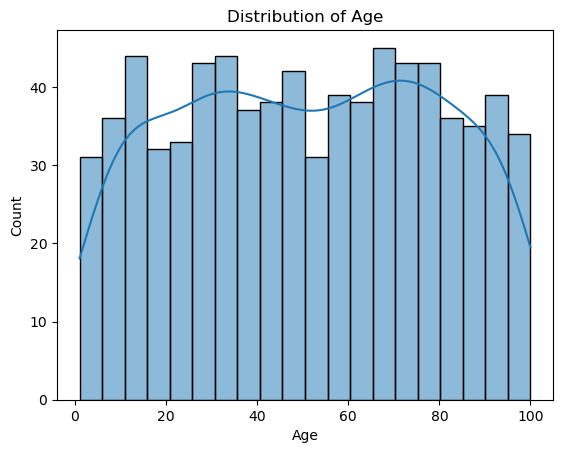

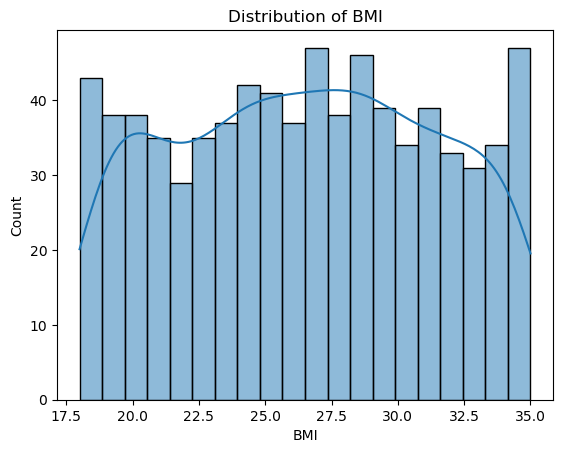

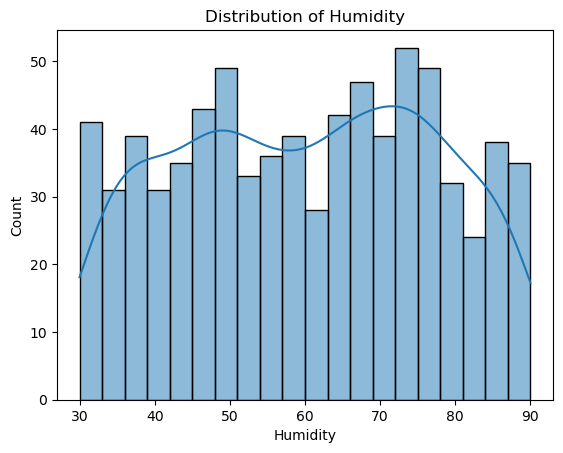

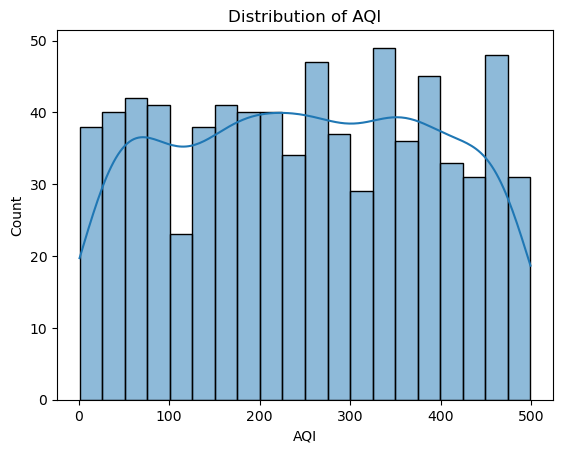

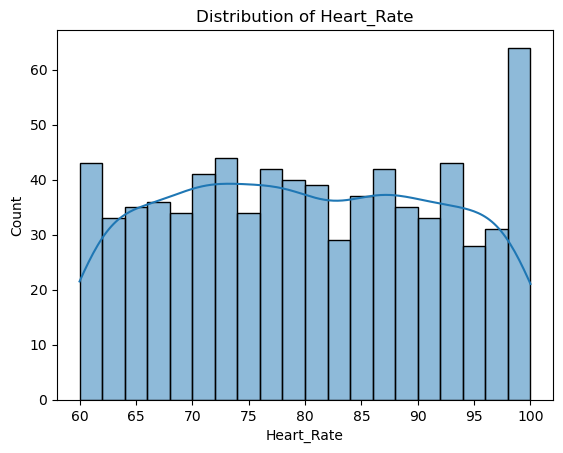

In [22]:
# Hisplot for all numeric colummns
num_col = data.select_dtypes(include=["int64","float64"]).columns
for col in num_col:
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

In [23]:
data.hist(figsize=(15,10))

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'AQI'}>,
        <Axes: title={'center': 'Heart_Rate'}>]], dtype=object)

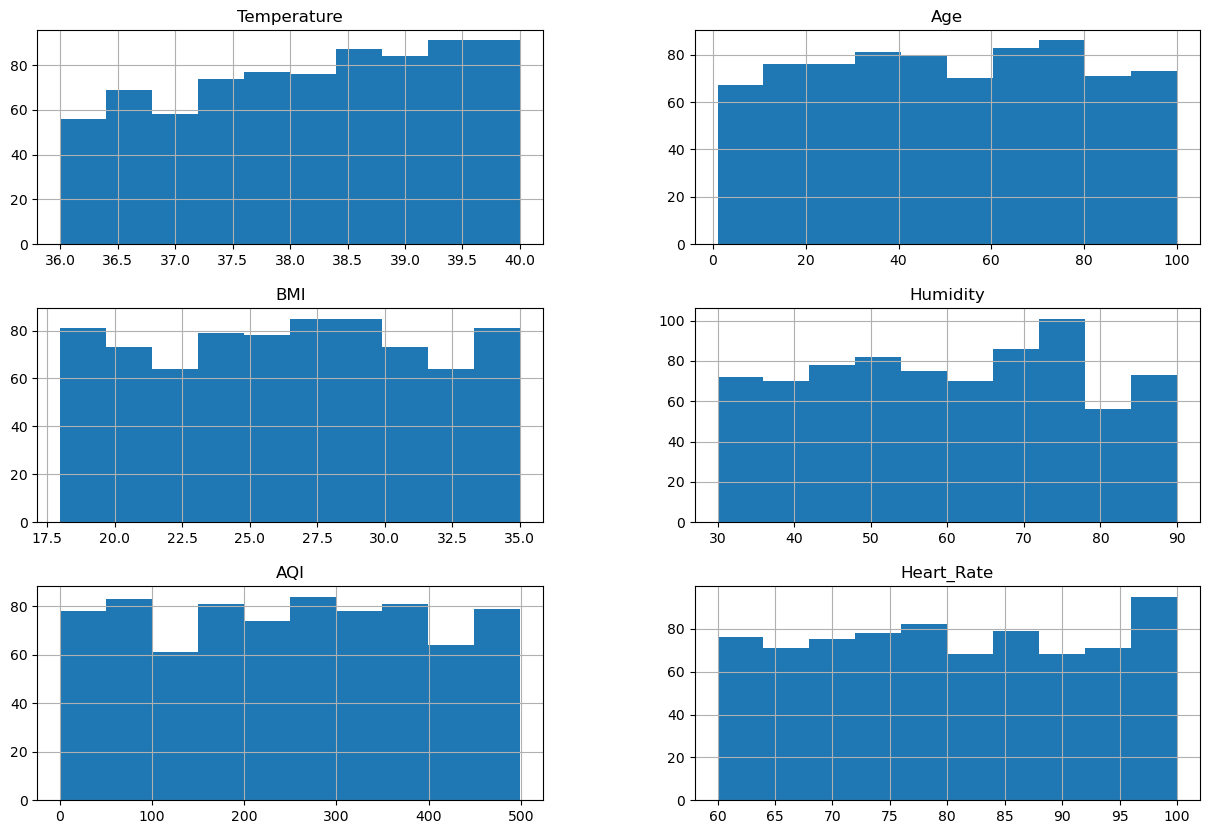

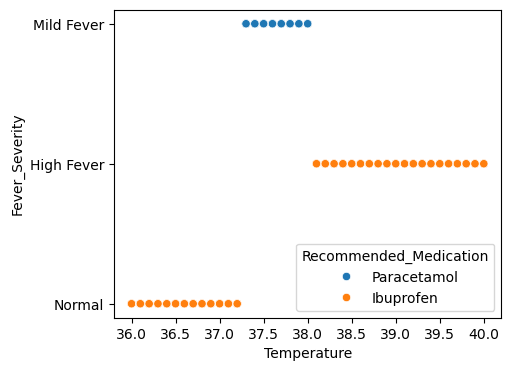

In [24]:
# Scatter Plot...
plt.figure(figsize=(5,4))
sns.scatterplot(x="Temperature", y= 'Fever_Severity', hue="Recommended_Medication",data=data)
plt.show()

# 3. Data Preprocessing
## Preprocessing is essential to prepare the data for model training. peline.

In [26]:
# Encode object data..

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_col:
    data[col] = le.fit_transform(data[col])
data.head(3)

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
1,37.5,1,94,1,26.6,0,0,0,1,0,1,1,44.4,10,0,2,62,0,1,1
3,39.8,0,66,1,18.7,0,1,0,0,0,0,0,44.1,438,0,0,96,0,1,0
4,39.3,0,28,1,21.0,0,1,0,1,1,1,1,65.9,451,0,2,85,1,2,0


In [27]:
le.classes_

array(['Ibuprofen', 'Paracetamol'], dtype=object)

In [28]:
data["Recommended_Medication"].unique()

array([1, 0])

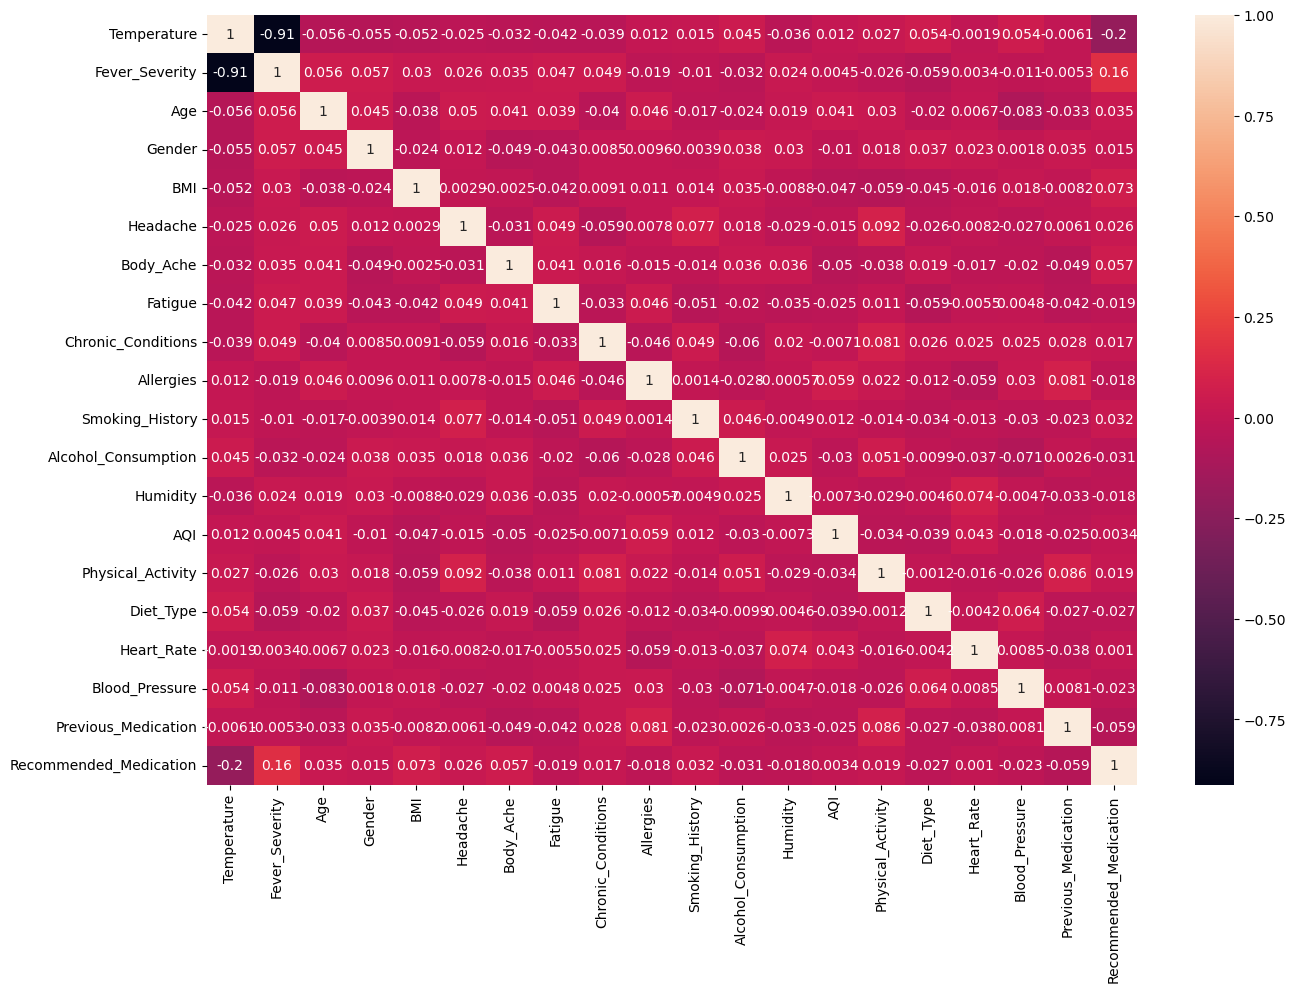

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

In [30]:
# Feature Scalling
x = data.drop(['Recommended_Medication'], axis=1)
y = data["Recommended_Medication"]

In [31]:
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head(3)

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication
0,-0.549795,0.320955,1.510724,0.990867,0.022654,-1.027912,-1.046974,-0.99869,0.930336,-0.957646,0.998690,0.952628,-0.926887,-1.673426,-1.163164,1.247194,-1.511537,-1.197504,-0.012902
1,1.474618,-0.850761,0.525586,0.990867,-1.595239,-1.027912,0.955134,-0.99869,-1.074880,-0.957646,-1.001311,-1.049728,-0.944606,1.318284,-1.163164,-1.192829,1.369813,-1.197504,-0.012902
2,1.034528,-0.850761,-0.811388,0.990867,-1.124207,-1.027912,0.955134,-0.99869,0.930336,1.044227,0.998690,0.952628,0.343000,1.409154,-1.163164,1.247194,0.437612,0.017517,1.217603


In [32]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Machine Learning Classifier Models

## RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)*100 , rfc.score(x_train,y_train)*100

(88.23529411764706, 94.59016393442623)

In [36]:
# for i in range(1,30):
#     rfc1 = RandomForestClassifier(n_estimators=i)
#     rfc1.fit(x_train,y_train)
#     print(i,rfc1.score(x_test,y_test)*100 , rfc1.score(x_train,y_train)*100)

## XGBClassifier

In [38]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)*100 , xgb.score(x_train,y_train)*100

(100.0, 100.0)

# ***** Confusion Matrix *****

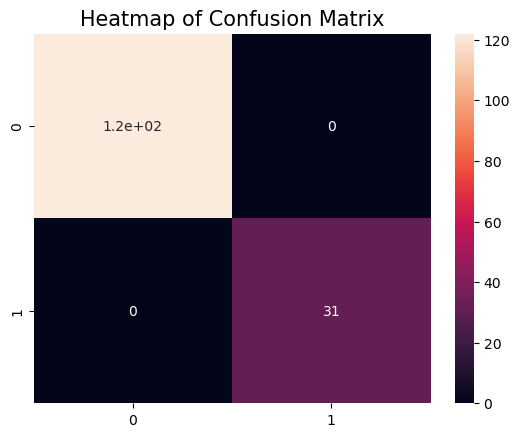

In [40]:
cm = confusion_matrix(y_test, xgb.predict(x_test))
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [46]:
print(classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        31

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_test, xgb.predict(x_test)) , mean_absolute_error(y_test, xgb.predict(x_test))

(0.0, 0.0)

# Predict Model

In [51]:
# Example: Predicting on new data
sample_input = np.array([[37.5, 1, 94, 1, 26.6, 0, 0, 0, 1, 0, 1, 1, 44.4, 10, 0, 2, 62, 0, 1]])

# Make prediction
# prediction = loaded_model.predict(sample_input)
# predicted_medication = le.inverse_transform(prediction)

prediction = xgb.predict(sample_input)

if prediction[0] == 0:
    print("\nRecommended Medication for the sample input: Ibuprofen \n")
elif prediction[0] == 1:
    print("\nRecommended Medication for the sample input: Paracetamol \n")
else:
    print("Invalid Input.. Try Again!")


Recommended Medication for the sample input: Ibuprofen 



# Save Model

In [54]:
import pickle

pickle.dump((xgb,sc),open("weather_model.pkl","wb"))

# Load model
xgb, sc = pickle.load(open("weather_model.pkl", "rb"))